In [1]:
import torch
from math import pi,sqrt,log,e,exp
from time import time
from matplotlib import pyplot
import numpy as np
from matplotlib import pyplot as plt
from tqdm.autonotebook import tqdm
#torch.set_default_dtype(torch.float64)
device = torch.device("cuda:4")


In [2]:
from src.models.flows.coupling_cells.real_nvp import RealNVP
from src.models.flows.sampling import FactorizedGaussianSampler, UniformSampler
from src.models.flows.analytic_flows.element_wise import InvertibleAnalyticSigmoid
from src.models.flows.sequential import InvertibleSequentialFlow
from src.training.weighted_dataset.dkl_training import GenericDKLTrainer
from src import setup_rootlogger

In [3]:
setup_rootlogger()

In [4]:
#from src.training.weighted_dataset.weighted_dataset_trainer import logger as wdtlogger
#wdtlogger.setLevel(logging.DEBUG)
#wdtlogger.addHandler(logging.StreamHandler())

In [5]:
def f(x):
    return torch.exp(-10*(2*x[:,1]-torch.cos(4*pi*x[:,0])-1)**2)

In [6]:
posterior=UniformSampler(d=2,low=0.,high=1.,device=device)
prior=FactorizedGaussianSampler(d=2,device=device)

In [7]:
try:
    del model
except:
    pass


model  = InvertibleSequentialFlow(2,[
        RealNVP(d=2,
              mask=[True,False],
              d_hidden=256,
              n_hidden=16,).to(device),
        RealNVP(d=2,
              mask=[False,True],
              d_hidden=256,
              n_hidden=16,).to(device),
        RealNVP(d=2,
              mask=[True,False],
              d_hidden=256,
              n_hidden=16,).to(device),
        RealNVP(d=2,
              mask=[False,True],
              d_hidden=256,
              n_hidden=16,).to(device),
    InvertibleAnalyticSigmoid(d=2),
])

optim = torch.optim.Adam(model.parameters(),lr=1.e-4)

In [8]:
trainer = GenericDKLTrainer(flow=model,latent_prior=prior)

In [9]:
trainer.train_on_target_batches_from_posterior(
    f=f,
    batch_size=100000,
    n_epochs_per_batch=10,
    minibatch_size=20000,
    n_batches=15,
    target_posterior=posterior,
    optim=optim
)

Training on 15 independent batches of size 100000
Performing 10 epochs per batch
Each epoch applies 5 gradient steps
Generating a new batch of points
Training on batch: 100000 points
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Generating a new batch of points
Training on batch: 100000 points
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Generating a new batch of points
Training on batch: 100000 points
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Generating a new batch of points
Training on batch: 100000 points
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Generating a new batch of points
Training on batch: 100000 points
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/1

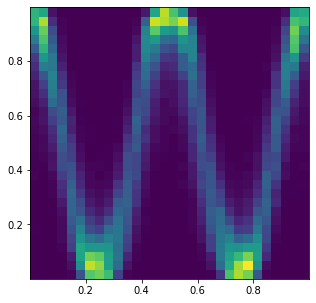

In [10]:
x=trainer.sample_forward(100000).cpu().numpy()
plt.figure(figsize=(5,5))
plt.hist2d(x[:,0],x[:,1],bins=30)
plt.show()